## **Part A: kNN on time series data**

In this assignment we will build a k Nearest Neighbor Classsifier on brain Functional magnetic resonance imaging time series data.


You are a senior data scientist in a hospital and your job is to build a model to classify patients using a data-driven approach either as:

1.  PostConcussion Syndrome (PCS)
2.  Post-traumatic stress disorder (PTSD) 
3.  Non-sick (Control)




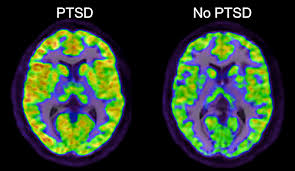

For computing distances you can use scipy.spatial distance library: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html

Let's start first by importing all the package that we need in this homework. ( Do not forget to run every code block)

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import matplotlib.pyplot as plt


Now let's add the data file in the sample_data folder of the Files tab (in the left corner)

We will then read the CSV data that we just uploaded from the python script

In [2]:
# Read the data file and print it
data = pd.read_csv('sample_data/PTSD_DATA.csv')
print(data)

FileNotFoundError: ignored

We will split the data into a testing and training set using a holdout method where 30% of the data will be reserved for testing and the remaining 70% will be reserved for training.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# X: stores the time series data
# y: stores the time series data labels {PTSD, PCS_PTSD, or Control}


X= data[data.columns[:-1]]
y= data['Target']

# We will be using the scikit learn library StratifiedShuffleSplit function for splitting the data set
#test_size : should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.

sss = StratifiedShuffleSplit(n_splits=1, test_size= 0.3)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # X_train is the training data set.
    # y_train is the set of labels to all the data in x_train.
    # X_test is the test data set.
    # y_test is the set of labels to all the data in x_test.

Here we will define three utility functions that we will use later for the kNN mining:


In [ ]:
#The function takes a list and returns the most frequent element in the list
def most_frequent(List):
    freq = Counter(List)
    return freq.most_common(1)[0][0]


# TRY YOUR FUNCTION: It should return 2
m = most_frequent([1,2,3,4,3,2,2,2])
print(m)


2


In [ ]:
#The function takes a time series as an input, compares it with all time series 
#data in the training set (X_train) and returns the vector of euclidean distances

def get_distVector(timeSeries):
    dist_lst= []
    #Interate over all the indices of the time series training set matrix
    for i in range(X_train.shape[0]):
      dist = distance.euclidean(timeSeries, X_train[i:i + 1].values[0])
      dist_lst.append(dist)

    return dist_lst

m = get_distVector(X_train[1:2].values[0])

print(m)


[51.360177517262876, 0.0, 14.42844131244229, 39.561826129948656, 89.28168690070552, 53.30884622225626, 46.446168449242556, 14.74946729690717, 9.170836174381385, 13.802915747774012, 30.452072325219106, 6.366864189635622, 36.7016906231211, 43.647405724872705, 8.497404578931489, 35.58600304246297, 47.55550038649089, 23.20462522935136, 73.32561151386378, 71.37098597098064, 6.689710689147632, 69.34089809512382, 34.63480496043873, 23.814701861200703, 21.982805552212934, 22.833797515755137, 60.316222371295176, 48.482215137395755, 9.176033534571461, 44.48945450265616, 20.039394324770658, 25.32411188415687, 77.36526600743439, 38.61950596995123, 54.478354265133476, 67.254540438341, 43.784296994800215, 25.926734683618562, 7.076049802749971, 62.368330657526535, 85.24851888568816, 21.87025764945196, 63.331621258274915, 72.32280360395002, 18.489080165030735, 80.25781885525537, 9.321055199682348, 10.265152652535184, 47.48528684869715, 9.386622946197416, 17.609109214848388, 90.34933678976904, 45.42446

In [ ]:
#The function takes a vector of distances with all elements in the training set and returns 
#the label with the most frequent vote among the k nearest neighbors

def get_vote(distances, k):
    votes = []
    idx = np.argpartition(distances, k)[:k] # indices of the k nearest neighbors in the time series training set matrix
    for id in idx:
      votes.append(y_train[id:id + 1].values[0])
    return most_frequent(votes)


Now that the we defined the utility functions,
time to test our model with different k from 1 to 60 with 2 increments

In [ ]:
test_accuracies = []
train_accuracies = []

for k in range(1,60,2):
    print("K = "+str(k))
    ytest_pred, ytrain_pred = [], []
    for i in range(len(y_test)):
        # Get the distance between test example i and all the time series in the training set
        distances =  get_distVector(X_test[i:i+1].values[0])
        # Get the majority voted label
        vote =  get_vote(distances, k)
        # Append the predicted vote to the predicted list of lasbels ytest_pred
        ytest_pred.append(vote)

    test_accuracies.append(accuracy_score(y_test,ytest_pred))

    for i in range(len(y_train)):
        # Get the distance between train example i and all the time series in the training set
        distances = get_distVector(X_train[i:i+1].values[0]) 
        # Get the majority voted label
        vote = get_vote(distances, k)
        # Append the predicted vote to the predicted list of lasbels ytrain_pred
        ytrain_pred.append(vote)
    train_accuracies.append(accuracy_score(y_train, ytrain_pred))

K = 1
K = 3
K = 5
K = 7
K = 9
K = 11
K = 13
K = 15
K = 17
K = 19
K = 21
K = 23
K = 25
K = 27
K = 29
K = 31
K = 33
K = 35
K = 37
K = 39
K = 41
K = 43
K = 45
K = 47
K = 49
K = 51
K = 53
K = 55
K = 57
K = 59


Hurray! your model is trained, and it predicted the test data.
Now is the time to plot the learning curve by plottting the train_accuracies and test_accuracies in the same plot.



> **Hint: To plot a list in python use:**


> lst=[1,2,3]


> plt.plot(lst)


> plt.show()


















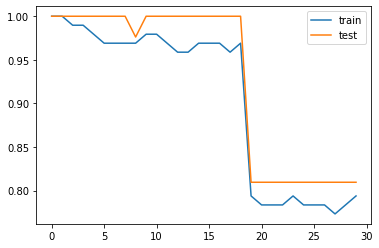

In [ ]:
#Plot training and testing accuracies you just computed in the same plot

plt.plot(train_accuracies, label = "train")
plt.plot(test_accuracies, label = "test")
plt.legend()
plt.show()

### **PART B: CS 6890 -  GRADUATE STUDENTS EXTRA 🌶️:**

**EXTRA 1:**
Implement a function called *get_distanceVector2*
 that takes 2 argument:
- a time series data (vector)
- a distance measure name ("*DTW*", "*Manhattan*" or, "*Minkowski_P3*" (Minkowski distance with p=3))
Similar to get_distVector, the function should return the distance between the time series and all the time series in the training set using the distance measure that the user choose as an input parameter

**Hint:** You can use external libraries to compute distances

In [ ]:
def get_distanceVector2(timeseries ,dist_name):
  dist =[]

  if dist=='Manhattan':  # INSERT CODE HERE
  elif dist =='Minkowski_P3':  # INSERT CODE HERE
  elif dist == 'DTW':  # INSERT CODE HERE
  else:  # INSERT CODE HERE
  
  return dist

**EXTRA 2:** Evaluate the model using get_distanceVector2 function with Manhattan distance



In [ ]:
test_accuracies = []
train_accuracies = []

for k in range(1,60,2):
    print("K = "+str(k))
    ytest_pred, ytrain_pred = [], []
    for i in range(len(y_test)):
        # Get the distance between test example i and all the time series in the training set
        distances =  # INSERT CODE HERE 
        # Get the majority voted label
        vote =  # INSERT CODE HERE
        # Append the predicted vote to the predicted list of lasbels ytest_pred
        ytest_pred.append(vote)

    test_accuracies.append(accuracy_score(y_test,ytest_pred))

    for i in range(len(y_train)):
        # Get the distance between train example i and all the time series in the training set
        distances = # INSERT CODE HERE 
        # Get the majority voted label
        vote = # INSERT CODE HERE 
        # Append the predicted vote to the predicted list of lasbels ytrain_pred
        ytrain_pred.append(vote)
    train_accuracies.append(accuracy_score(y_train, ytrain_pred))

In [ ]:
#Plot training and testing accuracies you just computed using Manhattan distance in the same plot

# INSERT CODE HERE
plt.show()